## Diabetes Prediction Model

Data dictionary
1. Glucose: Blood glucose 
2. Blood_Pressure: Blood pressure is the force of your blood pushing against the walls of your arteries.
                   Each time your heart beats, it pumps blood into the arteries.
3. Skin_Thickness: Skin thickness (epidermal surface to dermal fat inter- face),
                   which is primarily determined by collagen con- tent,
                   is greater in insulin-dependent diabetes mellitus (IDDM) patients who have been diabetic for >10 yr (11,12).
                   This possibly reflects increased collagen cross- linkage and reduced collagen turnover (2,3).
6. Insulin: Insulin is an essential hormone. It helps your body turn food into energy and controls your blood sugar levels.
7. BMI : Body Mass Index
8. DiabetesPedegreeFunction : Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic       family history.
9. Age

In [237]:
# Importing necessary modules and libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Importing estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from pandas.plotting import scatter_matrix

import joblib

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.drop("Pregnancies", axis = 1, inplace = True)

In [4]:
df.drop("Id", axis = 1, inplace = True)

In [5]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   2768 non-null   int64  
 1   BloodPressure             2768 non-null   int64  
 2   SkinThickness             2768 non-null   int64  
 3   Insulin                   2768 non-null   int64  
 4   BMI                       2768 non-null   float64
 5   DiabetesPedigreeFunction  2768 non-null   float64
 6   Age                       2768 non-null   int64  
 7   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 173.1 KB


In [8]:
df.shape

(2768, 8)

In [9]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [239]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

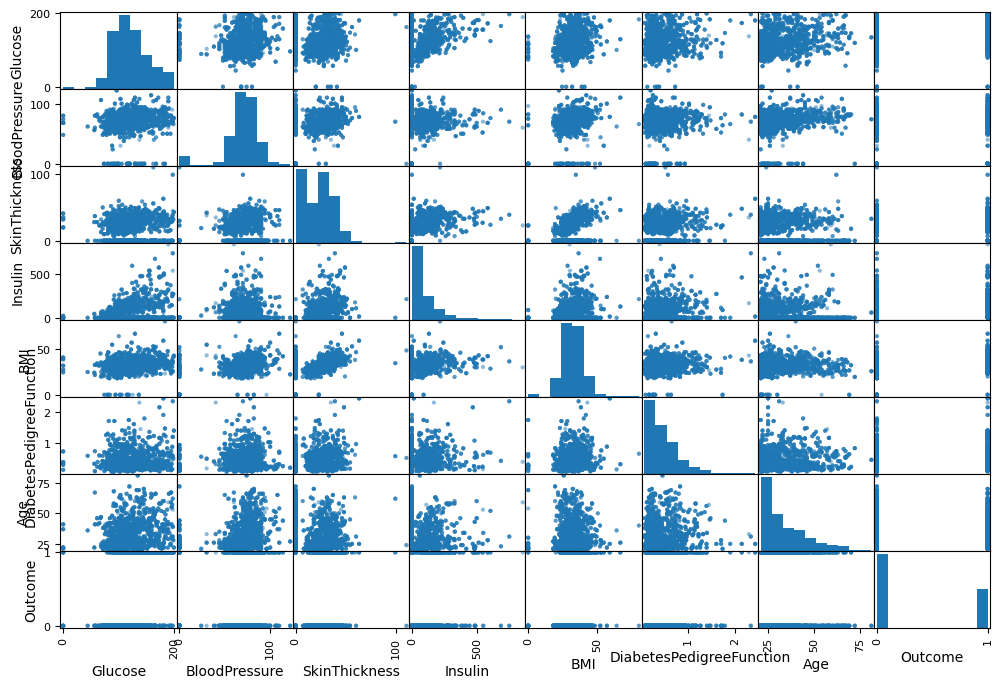

In [242]:
attributes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome']
scatter_matrix(df[attributes],  figsize=(12, 8))
plt.show()

Results of exploration so-far: columns: 8 data points: 2768 shape of the data: (2768, 8) No null values 

In [11]:
corr = df.corr()
corr

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


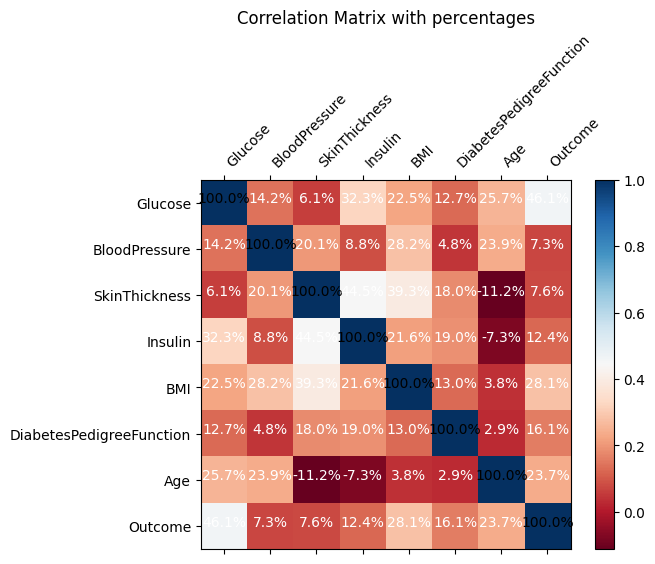

In [14]:
fig, ax = plt.subplots()
ax.set_title('Correlation Matrix with percentages')

cax = ax.matshow(corr, cmap='RdBu')

def fmt(x):
    return f"{100*x:.1f}%"

for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, fmt(z), ha='center', color='black' if abs(z) > 0.5 else 'white')

fig.colorbar(cax)

tick_labels = list(corr.columns)
ax.set_xticks(np.arange(len(tick_labels)))
ax.set_yticks(np.arange(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45, ha='left')
ax.set_yticklabels(tick_labels)

plt.show()

From the above correlation matrix we can conclude that the feature glucose is highly related to the outcome 

In [22]:
pd.crosstab(df["Glucose"], df["Outcome"]).T

Glucose,0,44,56,57,61,62,65,67,68,71,...,189,190,191,193,194,195,196,197,198,199
Outcome,,,,,,,,,,,,,,,,,,,,,
0,10,3,4,7,4,3,4,3,10,13,...,3,0,3,3,6,0,0,3,0,0
1,8,0,0,0,0,0,0,0,0,0,...,9,4,0,5,7,10,8,9,3,4


## Creating Training and testing data

In [92]:
np.random.seed(42)
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Creating the evaluation function

In [221]:
def model_evaluation(model, x, y, x_test, y_test):
    y_preds = model.predict(x_test)
    R2 = model.score(x_test, y_test)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    cv_score = cross_val_score(model, x , y, cv = 5)
    f1 = f1_score(y_test, y_preds)
    print(f"R2:{R2}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"cv_score:{np.mean(cv_score)}")
    print(f"f1:{f1}")

## Evaluating logisticRegression

In [222]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)
y_preds_1 = model_1.predict(x_test)
model_evaluation(model_1, x, y, x_test, y_test)

R2:0.7635379061371841
Precision:0.6944444444444444
Recall:0.5347593582887701
cv_score:0.7705903473668406
f1:0.6042296072507553


In [223]:
cm_1 = confusion_matrix(y_test, y_preds_1)
cm_1

array([[323,  44],
       [ 87, 100]], dtype=int64)

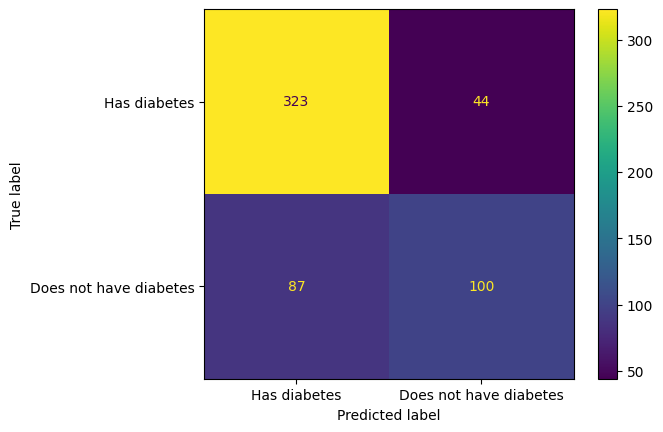

In [201]:
cmd = ConfusionMatrixDisplay(cm_1,display_labels=['Has diabetes', 'Does not have diabetes'])
cmd.plot();

## Evaluating KNeighborsClassifier

In [224]:
model_2 = KNeighborsClassifier()
model_2.fit(x_train, y_train)
y_preds_2 = model_2.predict(x_test)
model_evaluation(model_2, x, y, x_test, y_test)

R2:0.8646209386281588
Precision:0.7828282828282829
Recall:0.8288770053475936
cv_score:0.9028371664893167
f1:0.8051948051948052


In [225]:
cm_2 = confusion_matrix(y_test, y_preds_2)
cm_2

array([[324,  43],
       [ 32, 155]], dtype=int64)

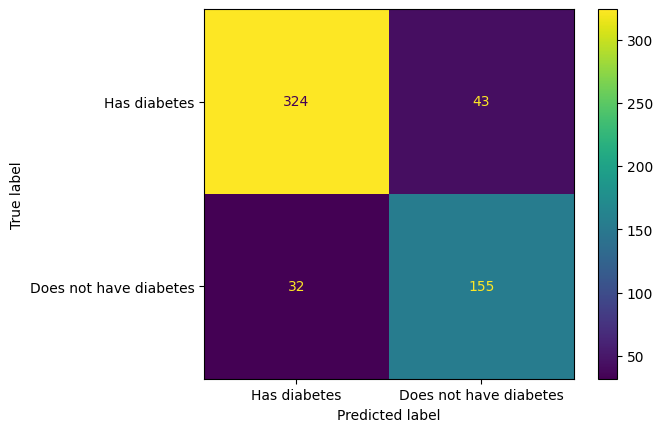

In [226]:
cmd = ConfusionMatrixDisplay(cm_2,display_labels=['Has diabetes', 'Does not have diabetes'])
cmd.plot()

## Evaluating RandomForestClassifier

In [227]:
model_3 = RandomForestClassifier()
model_3.fit(x_train, y_train)
y_preds_3 = model_3.predict(x_test)
model_evaluation(model_3, x, y, x_test, y_test)

R2:0.9819494584837545
Precision:0.9836065573770492
Recall:0.9625668449197861
cv_score:0.9916876113878352
f1:0.9729729729729729


In [228]:
model_3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [229]:
cm_3 = confusion_matrix(y_test, y_preds_3)
cm_3

array([[364,   3],
       [  7, 180]], dtype=int64)

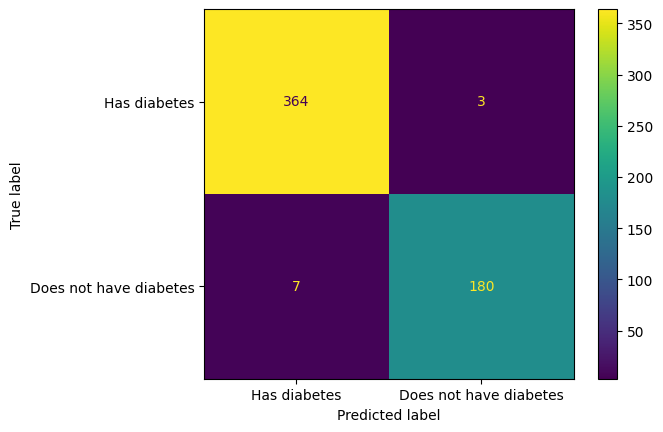

In [230]:
cmd = ConfusionMatrixDisplay(cm_3 ,display_labels=['Has diabetes', 'Does not have diabetes'])
cmd.plot()

## Plotting the ROC curve and AUC

Area under curve0.7074341750571915


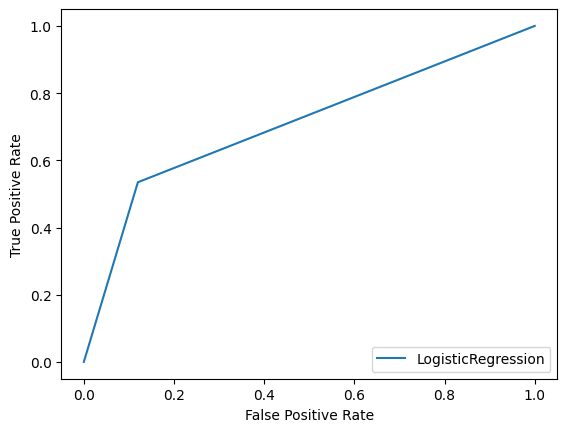

In [207]:
y_preds = model_1.predict(x_test)
fpr, tpr, threshold = roc_curve(y_true = y_test, y_score = y_preds)
Roc_curve = RocCurveDisplay(fpr = fpr , tpr = tpr, estimator_name = "LogisticRegression")
Roc_curve.plot()
fpr, tpr, thresholds = roc_curve(y_test, y_preds_1)
auc_wilcoxon = auc(fpr, tpr)
print(f"Area under curve{auc_wilcoxon}")

Area under curve0.8558553964067669


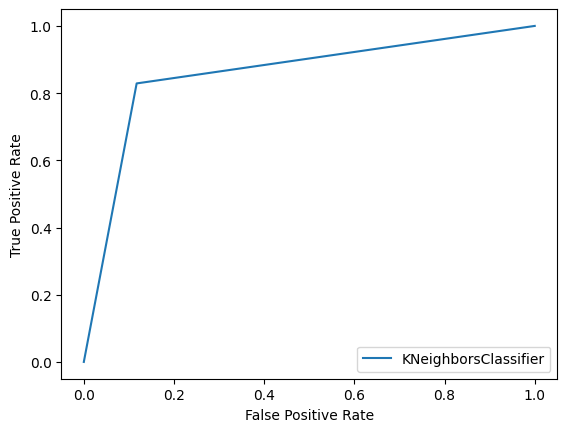

In [176]:
y_preds = model_2.predict(x_test)
fpr, tpr, threshold = roc_curve(y_true = y_test, y_score = y_preds)
Roc_curve = RocCurveDisplay(fpr = fpr , tpr = tpr, estimator_name = "KNeighborsClassifier")
Roc_curve.plot()
fpr, tpr, thresholds = roc_curve(y_test, y_preds_2)
auc_wilcoxon = auc(fpr, tpr)
print(f"Area under curve{auc_wilcoxon}")

Area under curve0.9771962289994025


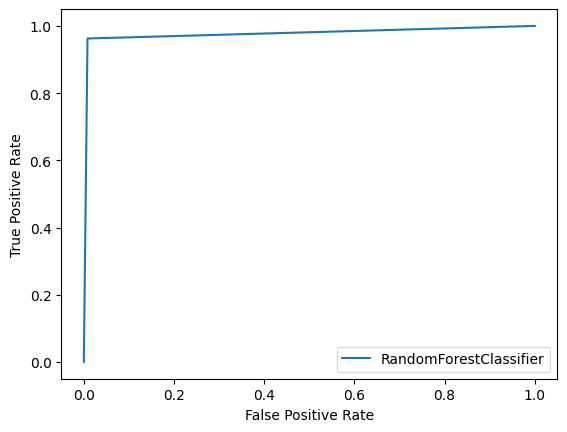

In [177]:
y_preds = model_3.predict(x_test)
fpr, tpr, threshold = roc_curve(y_true = y_test, y_score = y_preds)
Roc_curve = RocCurveDisplay(fpr = fpr , tpr = tpr, estimator_name = "RandomForestClassifier")
Roc_curve.plot()
fpr, tpr, thresholds = roc_curve(y_test, y_preds_3)
auc_wilcoxon = auc(fpr, tpr)
print(f"Area under curve{auc_wilcoxon}")

From the above observation we can conclude that RandomForestClassifier is the best model 

## Hyperparameter Tuning 

In [133]:
grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'random_state': [0, 10, 20, 30]
}

In [151]:
gd_cv = GridSearchCV(estimator = model_3,
                      param_grid = grid,
                      n_jobs = -1, 
                     cv = 5, verbose = 2)
gd_cv.fit(x_train, y_train);

Fitting 5 folds for each of 4096 candidates, totalling 20480 fits


C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5120 fits failed out of a total of 20480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 417, in 

In [178]:
gd_cv.score(x_test, y_test)

0.983754512635379

In [179]:
gd_cv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10,
 'oob_score': False,
 'random_state': 0}

In [209]:
final_model = RandomForestClassifier(bootstrap= False,
 max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 10,
 oob_score= False,
 random_state= 42)
final_model.fit(x_train, y_train)
y_final_preds = final_model.predict(x_test)

In [210]:
model_evaluation(final_model, x , y, x_test, y_test)

R2:0.9873646209386282
Precision:1.0
Recall:0.9625668449197861
cv_score:0.9819341593209605
f1:0.9809264305177112


In [212]:
final_cm = confusion_matrix(y_test, y_final_preds)
final_cm

array([[367,   0],
       [  7, 180]], dtype=int64)

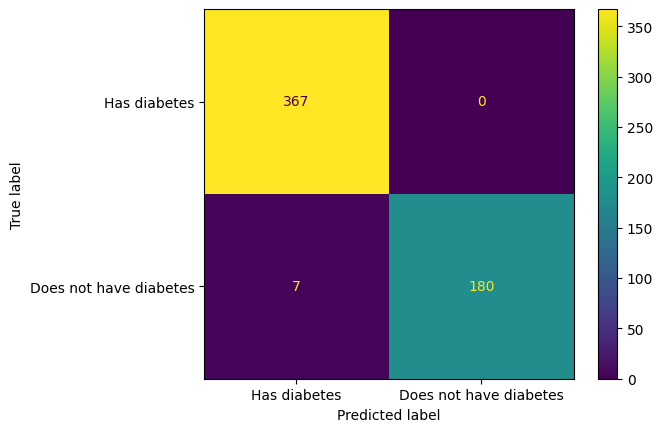

In [213]:
cmd = ConfusionMatrixDisplay(final_cm,display_labels=['Has diabetes', 'Does not have diabetes'])
cmd.plot()

In [243]:
joblib.dump(final_model, "Diabetes_prediction_model_2.joblib")

['Diabetes_prediction_model_2.joblib']

In [244]:
sample_input = np.array([150, 70, 20, 100, 12.4, 0.324, 30])
model = joblib.load('Diabetes_prediction_model_2.joblib')
array = sample_input.reshape(1, -1)
model.predict(array)

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)